# 🎓 **Taller 4.3: Taller de Métodos de clustering basados en particiones Parte 2**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


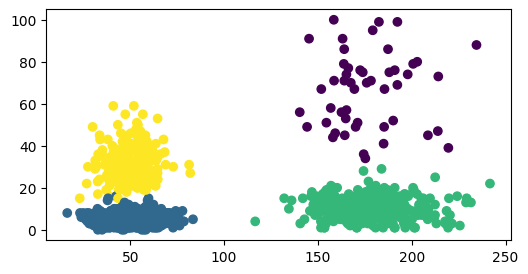

In [3]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-means que tiene un único parámetro: el número de clústeres (K).**

In [4]:
# PASO 1 elejir los centros iniciales de forma randomica
def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

def paso1_elije_centros(K, Dx):
    cDx = np.zeros(K*Dx.shape[1])
    cDx.shape = (K,Dx.shape[1])
    # 1.1 Completa el codigo aqui
    x1 = random_sample_float(K, np.min(Dx[:,0]), np.max(Dx[:,0]))
    x2 = random_sample_float(K, np.min(Dx[:,1]), np.max(Dx[:,1]))
    cDx[:,0] = x1
    cDx[:,1] = x2
    return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 92.16985717  54.2384124 ]
 [ 46.86708004  82.70213352]
 [111.46712867  69.89044241]
 [186.89987049  54.00674604]]


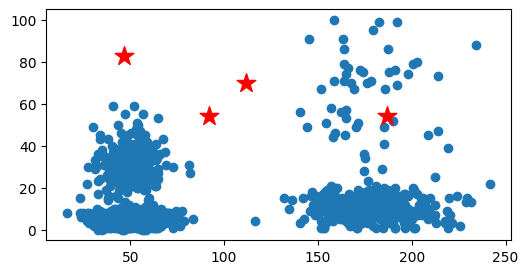

In [5]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_centros(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [6]:
# Definimos la distancia euclidiana de una instancia x con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
  return np.linalg.norm(C - x, axis=1);

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    for i in np.arange(Dx.shape[0]):
        # 1.2 Completa el codigo aqui
        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

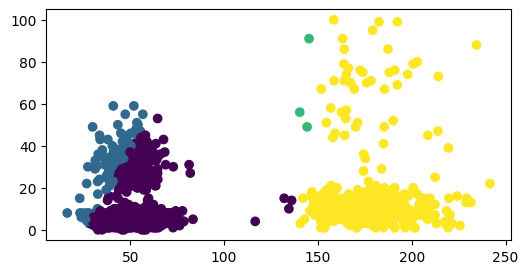

In [7]:
Dyp = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)

2.   Paso de actualización del centroide
En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$


In [8]:
def paso3_actualiza_centros(Dx, cDx, Dyp, K):
    cDx_ant = cDx.copy()
    for k in range(K):
        puntos_cluster_k = Dx[Dyp == k]
        if len(puntos_cluster_k) > 0:
            # 1.3 Completa el codigo aqui
            cDx[k,:] = np.mean(puntos_cluster_k, axis=0)
        else:
            cDx[k,:] = cDx_ant[k,:]
    return cDx

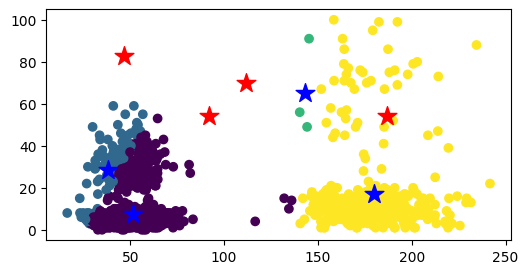

In [9]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [10]:
def MyKMeans(Dx, K):
    # 1.4 Completa el codigo aqui
    cDx = paso1_elije_centros(K, Dx)
    cDxIni = cDx.copy()
    iterando = True
    while iterando:
        cDx_ant = cDx.copy()
        # 1.5 Completa el codigo aqui
        Dyp = paso2_asigna_puntos(Dx, cDx)
        # 1.6 Completa el codigo aqui
        cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)
        iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
    return cDx, Dyp, cDxIni

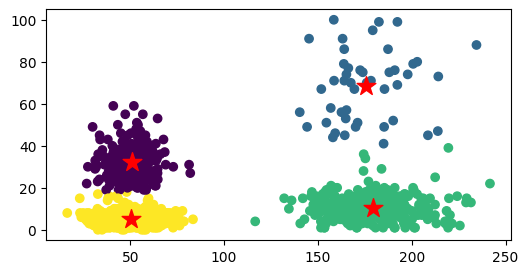

In [11]:
cDx, Dyp,cDxIni = MyKMeans(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 1: MODIFICA KMEANS PARA QUE SE CONVIERTA EN KMEANS++**

In [12]:
def distancia_euclidiana(a, b):
  return np.sqrt(np.sum((a - b) ** 2, axis=1))

def paso1_elije_centros_inteligente(K, Dx):
    cDx = np.zeros(K*Dx.shape[1])
    cDx.shape = (K, Dx.shape[1])

    n_samples, n_features = Dx.shape
    first_idx = np.random.randint(n_samples)
    cDx[0] = Dx[first_idx]

    for k in range(1, K):
        distances = np.zeros(n_samples)
        for i in range(n_samples):
            point = Dx[i]
            dist_to_centroids = distancia_euclidiana(cDx[:k], np.tile(point, (k, 1)))
            # 1.1 Completa tu codigo aqui (Distancia mínima al centroide más cercano)
            distances[i] = np.min(dist_to_centroids)

        probabilities = distances ** 2
        probabilities /= probabilities.sum()

        # 1.1 Completa tu codigo aqui (Elección basada en probabilidad)
        next_idx = np.random.choice(n_samples, p=probabilities)
        cDx[k] = Dx[next_idx]
    return cDx

In [13]:
def MyKMeansPlusPlus(Dx, K):
    # 1.3 Completa el codigo aqui
    cDx = paso1_elije_centros_inteligente(K, Dx)
    cDxIni = cDx.copy()
    iterando = True
    while iterando:
        cDx_ant = cDx.copy()
        # 1.4 Completa el codigo aqui
        Dyp = paso2_asigna_puntos(Dx, cDx)
        # 1.5 Completa el codigo aqui
        cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)
        iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
    return cDx, Dyp, cDxIni

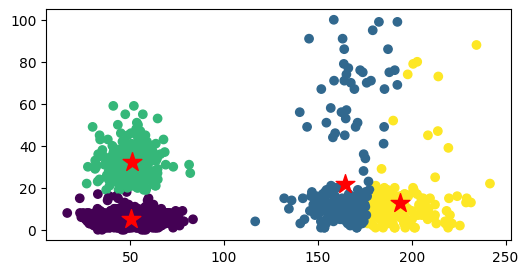

In [14]:
cDx, Dyp,cDxIni = MyKMeansPlusPlus(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 2: USA EL METODO DEL CODO CON KMEANS++ PARA DETERMINAR EL MEJOR K**
<hr>
<h2>Elegir el mejor valor de K</h2>

Para elegir el mejor valor de K se suele usar la técnica del codo. Ésta consiste en probar diferentes valores de K y evaluar el agrupamientos según alguna medida de evaluación intrínseca (ya que se supone que no se conoce la verdad básica). En este ejemplo, se usan dos medidas diferentes: la medida de Silueta y la R cuadrado.


In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [16]:
def medida_R_cuadrado(X, Xyp, cXs):
    # Calcular SST (Suma Total de Cuadrados)
    centro_global = np.mean(X, axis=0)
    SST = np.sum(np.sum((X - centro_global)**2, axis=1))
    # Calcular SSE (Suma de Cuadrados del Error)
    SSE = 0
    for i in range(len(X)):
        # Encontrar el centroide correspondiente para cada punto
        cluster_label = int(Xyp[i])
        centroide = cXs[cluster_label]
        SSE += np.sum((X[i] - centroide)**2)

    # Calcular R²
    if SST == 0:
        return 1.0
    R_cuadrado = 1 - (SSE / SST)
    return R_cuadrado

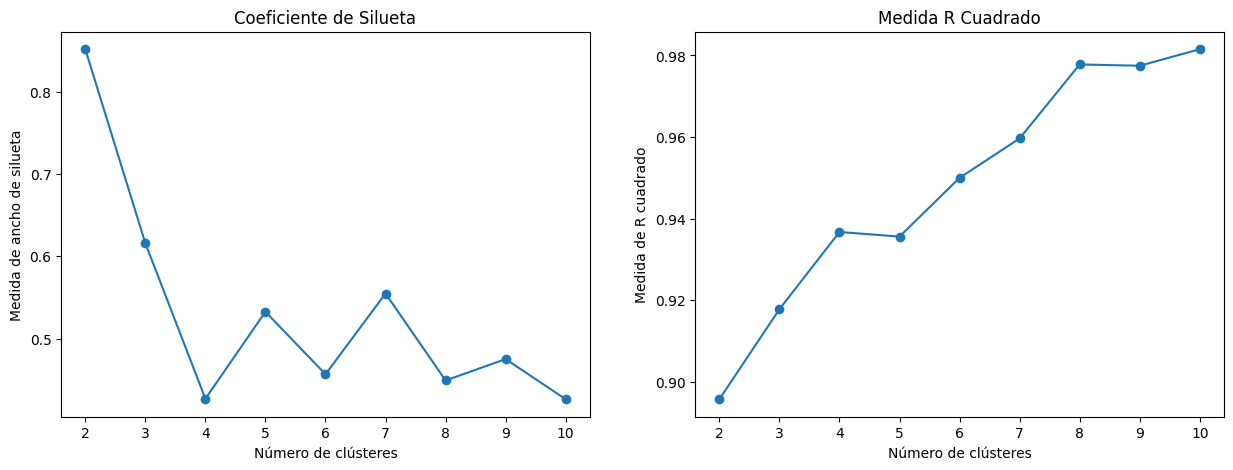

In [17]:
#METODO DEL CODO
# voy a probar para valores de k desde 2 al 11
rsilueta = np.zeros(9)
rrsquare = np.zeros(9)

for k in np.arange(2, 11):
    cDx, Dyp, cDxIni = MyKMeansPlusPlus(Dx, k)
    # 2.1 Completa el codigo aqui (Score de Silueta)
    rsilueta[k-2] = silhouette_score(Dx, Dyp)
    # 2.2 Completa el codigo aqui (R cuadrado)
    rrsquare[k-2] = medida_R_cuadrado(Dx, Dyp, cDx)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.arange(2, 11), rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")
ax[0].set_title("Coeficiente de Silueta")

ax[1].plot(np.arange(2, 11), rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de R cuadrado")
ax[1].set_title("Medida R Cuadrado")
plt.show()

Redacte una conclusión que analice los gráficos del método del codo y del coeficiente de silueta (y/o R²) para la selección del número de clusters (k). Indique cuál es el valor óptimo de k y fundamente su elección con base en la interpretación de dichos gráficos.

Al analizar los gráficos, observamos que el Coeficiente de Silueta alcanza su valor máximo en k=4, lo que indica que los clusters están bien definidos y separados. Por otro lado, la métrica R cuadrado muestra un incremento constante, pero a partir de k=4 la pendiente se suaviza (se vuelve menos pronunciada), lo que sugiere que agregar más clusters no mejora significativamente la explicación de la varianza. Por tanto, el valor óptimo es k=4.

## Métricas disponibles en KMeans de scikit-learn
El objeto KMeans de scikit-learn proporciona varias métricas y atributos importantes para evaluar el clustering:


Text(0, 0.5, 'Medida de incercia')

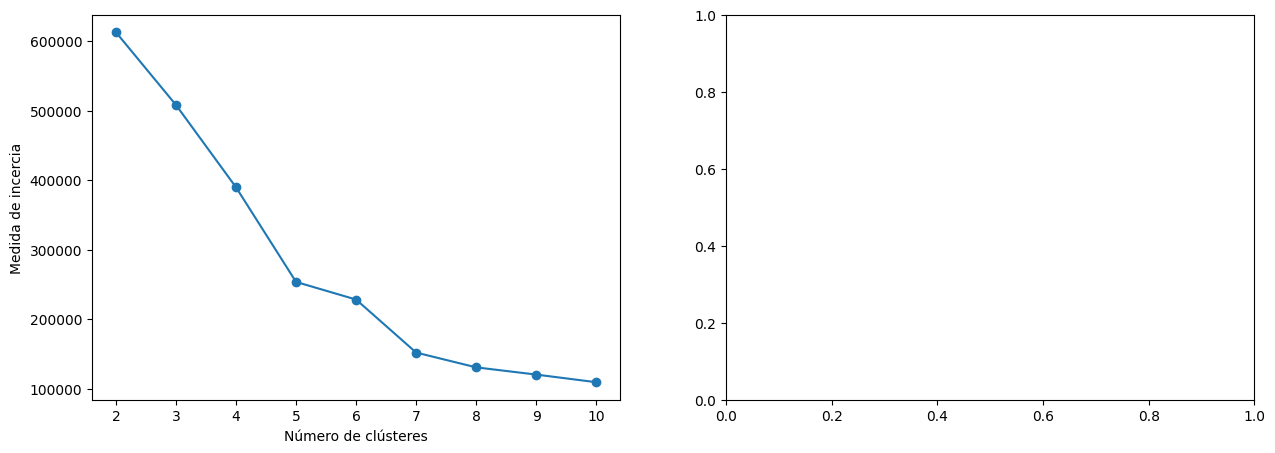

In [18]:
from sklearn.cluster import KMeans

rincercia = np.zeros(9)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Dx)
    rincercia[k-2] =  kmeans.inertia_

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de incercia")

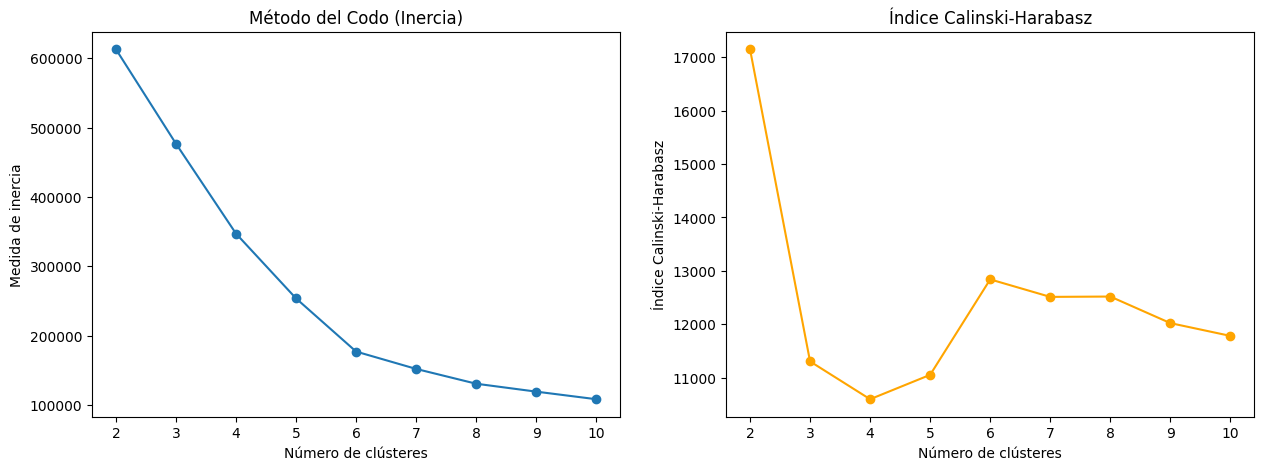

In [20]:
# 2.3 Complete el codigo anterior para graficar el indice de calinski
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

rincercia = np.zeros(9)
rcalinski = np.zeros(9) # Creamos el array para Calinski

for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warnings
    kmeans.fit(Dx)
    rincercia[k-2] = kmeans.inertia_
    # Calculamos Calinski Harabasz
    rcalinski[k-2] = calinski_harabasz_score(Dx, kmeans.labels_)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de Inercia
ax[0].plot(np.arange(2, 11), rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de inercia")
ax[0].set_title("Método del Codo (Inercia)")

ax[1].plot(np.arange(2, 11), rcalinski, linestyle='-', marker='o', color='orange')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Índice Calinski-Harabasz")
ax[1].set_title("Índice Calinski-Harabasz")

plt.show()

Redacte una conclusión comparativa basada en el gráfico de inercia (método del codo) y el índice de Calinski-Harabasz. Determine el número óptimo de clusters (k) e interprete cómo cada métrica justifica dicha selección.

El gráfico de Inercia muestra un 'codo' claro en k=4, donde la reducción del error intra-cluster deja de ser drástica. Simultáneamente, el índice de Calinski-Harabasz muestra un pico máximo en k=4, indicando la mejor relación entre dispersión intra-cluster y separación inter-cluster. Ambas métricas justifican la selección de 4 clusters

# 🎯 **EJ 3: USA EL SIGUIENTE DATASET CON KMEANS++**
Cargue el dataset dataset_cuatro_separables_peque y realice el siguiente análisis de agrupamiento (clustering):

Determinación del k óptimo: Utilice el algoritmo k-means para calcular y graficar el método del codo con un rango de k razonable (por ejemplo, de 2 a 15 clusters).

Selección: Con base en los gráficos, justifique y seleccione el número óptimo de clusters (k_optimo).

Modelo final: Ajuste un modelo final de k-means utilizando el k_optimo.

Visualización: Visualice los resultados del agrupamiento y que los puntos estén coloreados según el cluster asignado. Incluya los centroides en la visualización.

✅ Dataset cargado desde URL GitHub


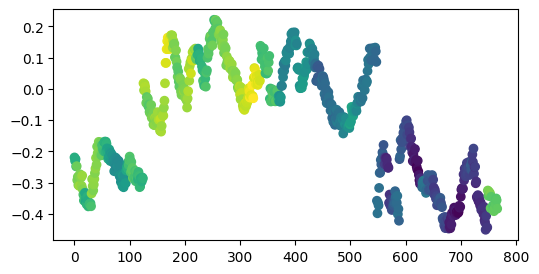

In [21]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_separables_peque.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

✅ Dataset cargado desde URL GitHub


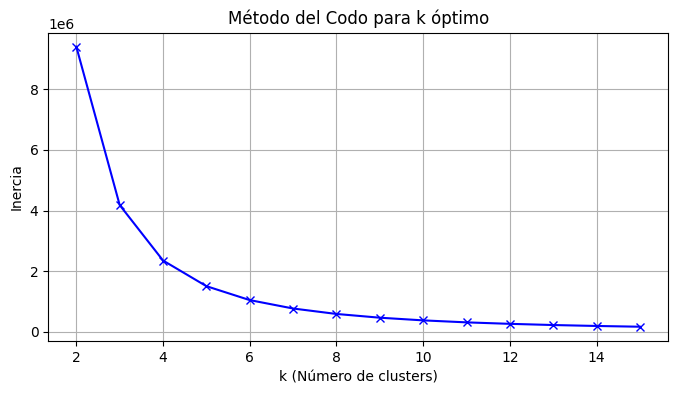

Seleccionando k_optimo = 4


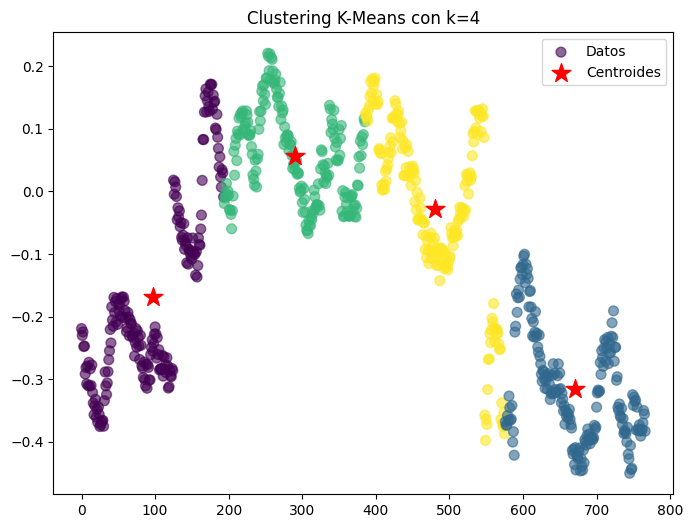

In [22]:
# EJ 3: USA EL SIGUIENTE DATASET CON KMEANS++

# 1. Cargar dataset
D_new = cargar_dataset("dataset_cuatro_separables_peque.xlsx")
if D_new is not None:
    Dx_new = D_new[:, 0:2]
    Dy_new = D_new[:, 2] # Etiquetas reales (solo para referencia visual inicial)

    # 2. Determinación del k óptimo (Método del Codo con Inercia)
    inertias = []
    K_range = range(2, 16)

    for k in K_range:
        # Usamos KMeans de sklearn que implementa k-means++ por defecto
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(Dx_new)
        inertias.append(kmeans.inertia_)

    # Graficar el codo
    plt.figure(figsize=(8, 4))
    plt.plot(K_range, inertias, 'bx-')
    plt.xlabel('k (Número de clusters)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para k óptimo')
    plt.grid(True)
    plt.show()

    # 3. Selección y Modelo final
    # Basado en el nombre del dataset y la gráfica probable, k=4 será el codo.
    k_optimo = 4
    print(f"Seleccionando k_optimo = {k_optimo}")

    model_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
    y_kmeans = model_final.fit_predict(Dx_new)
    centroids = model_final.cluster_centers_

    # 4. Visualización
    plt.figure(figsize=(8, 6))
    # Scatter de los puntos coloreados por el cluster asignado
    plt.scatter(Dx_new[:, 0], Dx_new[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6, label='Datos')
    # Scatter de los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', label='Centroides')

    plt.title(f'Clustering K-Means con k={k_optimo}')
    plt.legend()
    plt.show()

# 🚀 ¡TALLER FINALIZADO!"